In [40]:
%matplotlib inline
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.graph_objects as go



In [41]:
import pandas as pd
train_data = pd.read_csv('train.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_22044\3341933332.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  decompose.plot().show()


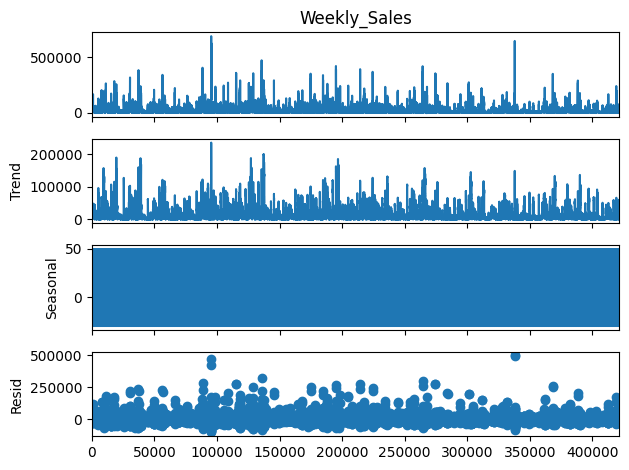

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(train_data.Weekly_Sales, model='additive', extrapolate_trend='freq', period=12)

decompose.plot().show()

In [43]:
train_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [44]:
train_data_prophet = train_data

# date variable needs to be named "ds" for prophet
train_data_prophet = train_data_prophet.rename(columns={"Date": "ds"})

# target variable needs to be named "y" for prophet
train_data_prophet = train_data_prophet.rename(columns={"Weekly_Sales": "y"})


In [45]:
model_prophet  = Prophet()
model_prophet.fit(train_data_prophet)

04:14:30 - cmdstanpy - INFO - Chain [1] start processing
04:15:41 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
data_future = model_prophet.make_future_dataframe(periods=12, freq='MS')
display(data_future)

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
150,2013-06-01
151,2013-07-01
152,2013-08-01
153,2013-09-01


In [47]:
forecast_prophet = model_prophet.predict(data_future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
150,2013-06-01,16925.0,-11958.0,45455.0
151,2013-07-01,16974.0,-13096.0,45379.0
152,2013-08-01,16377.0,-13709.0,46403.0
153,2013-09-01,16806.0,-10963.0,45848.0
154,2013-10-01,15754.0,-12627.0,46965.0


In [48]:
test_data = pd.read_csv("test.csv")
test_data

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,11/2/2012,False,1453329.50
1,1,1,11/9/2012,False,1827440.43
2,1,1,11/16/2012,False,358784.10
3,1,1,11/23/2012,True,1842821.02
4,1,1,11/30/2012,False,283178.12
...,...,...,...,...,...
115059,45,98,6/28/2013,False,NaN
115060,45,98,7/5/2013,False,NaN
115061,45,98,7/12/2013,False,NaN
115062,45,98,7/19/2013,False,NaN


In [55]:
# Drop columns where all values are missing
test_data.dropna(inplace=True)


In [56]:
test_data

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,1453329.50
1,1,1,2012-11-09,False,1827440.43
2,1,1,2012-11-16,False,358784.10
3,1,1,2012-11-23,True,1842821.02
4,1,1,2012-11-30,False,283178.12
...,...,...,...,...,...
12865,5,79,2013-05-03,False,713173.95
12866,5,79,2013-05-10,False,733455.07
12867,5,79,2013-05-17,False,734464.36
12868,5,79,2013-05-24,False,718125.53


In [57]:
test_data_prophet = test_data

# date variable needs to be named "ds" for prophet
test_data_prophet = test_data_prophet.rename(columns={"Date": "ds"})

# target variable needs to be named "y" for prophet
test_data_prophet = test_data_prophet.rename(columns={"Weekly_Sales": "y"})

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


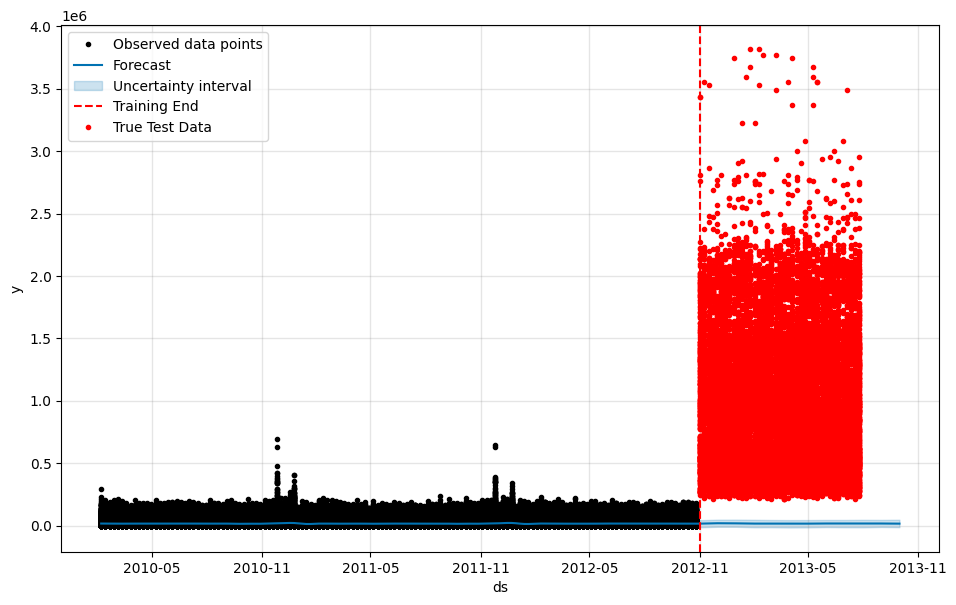

In [58]:
# plot the time series 
forecast_plot = model_prophet.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-12]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
test_data['Date'] = pd.to_datetime(test_data['Date'])
plt.plot(test_data['Date'], test_data['Weekly_Sales'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


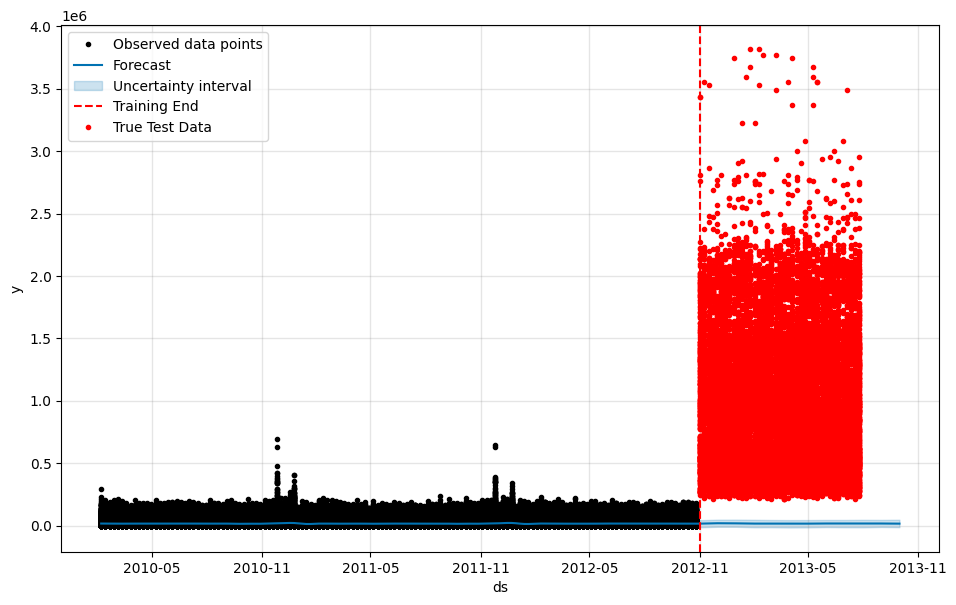

In [60]:
import matplotlib.pyplot as plt

# Plot the forecast
model_prophet.plot(forecast_prophet)

# Add a vertical line at the end of the training period
last_training_date = forecast_prophet['ds'].iloc[-12]
plt.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# Plot true test data for the period after the red line
test_data['Date'] = pd.to_datetime(test_data['Date'])
plt.plot(test_data['Date'], test_data['Weekly_Sales'], 'ro', markersize=3, label='True Test Data')

# Show the legend to distinguish between the lines
plt.legend()

# Show the plot
plt.show()
